<a href="/assets/tutorial07_example.ipynb" class="link-button">Download</a>
<a href="https://colab.research.google.com/github/technion046195/technion046195/blob/master/content/tutorial08/example.ipynb" target="_blank">
<img src="../assets/colab-badge.svg" style="display:inline"/>
</a>

<center><h1>
תרגול 8  - דוגמא מעשית
</h1></center>

## Setup

In [ ]:
## Importing packages
import os # A build in package for interacting with the OS. For example to create a folder.
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package
import imageio  # A package to read and write image (is used here to save gif images)
import tabulate  # A package from pretty printing tables
from graphviz import Digraph  # A package for plothing graphs (of nodes and edges)

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

## Setting some nice matplotlib defaults
plt.rcParams['figure.figsize'] = (4.5, 4.5)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## Auxiliary function for prining equations, pandas tables and images in cells output
from IPython.core.display import display, HTML, Latex, Markdown

## Create output folder
if not os.path.isdir('./output'):
    os.mkdir('./output')

### Data Inspection

In [ ]:
data_file = 'https://technion046195.netlify.app/datasets/wdbc.csv'

## Loading the data
dataset = pd.read_csv(data_file)

dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Train-Validation-Test split

In [ ]:
n_samples = len(dataset)

## Generate a random generator with a fixed seed
rand_gen = np.random.RandomState(1)

## Generating a vector of indices
indices = np.arange(n_samples)

## Shuffle the indices
rand_gen.shuffle(indices)

## Split the indices into 60% train / 20% validation / 20% test
n_samples_train = int(n_samples * 0.6)
n_samples_val = int(n_samples * 0.2)
train_indices = indices[:n_samples_train]
val_indices = indices[n_samples_train:(n_samples_train + n_samples_val)]
test_indices = indices[(n_samples_train + n_samples_val):]

train_full_indices = np.concatenate((train_indices, val_indices))

train_full_set = dataset.iloc[train_full_indices]
train_set = dataset.iloc[train_indices]
val_set = dataset.iloc[val_indices]
test_set = dataset.iloc[test_indices]

In [ ]:
def extract_x_y(dataset):
    x = dataset[['radius_mean', 'texture_mean']].values
    y = dataset['diagnosis'].values == 'M'
    return x, y

x_train, y_train = extract_x_y(train_set)
x_val, y_val = extract_x_y(val_set)

x_grid = np.stack(np.meshgrid(np.arange(5, 35 + 1e-9, 0.01), np.arange(5, 35 + 1e-9, 0.01)), axis=2)

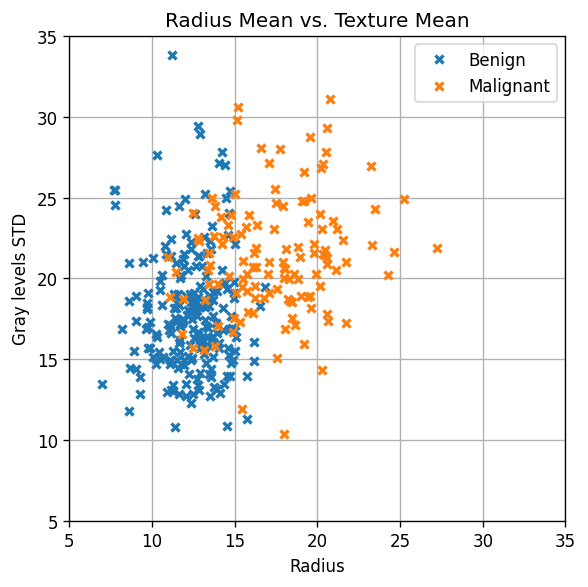

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_train[~y_train, 0], x_train[~y_train, 1], 'x', label='Benign', ms=5, mew=2)
ax.plot(x_train[y_train, 0], x_train[y_train, 1], 'x', label='Malignant', ms=5, mew=2)
ax.set_title('Radius Mean vs. Texture Mean')
ax.set_xlabel('Radius')
ax.set_ylabel('Gray levels STD');
ax.set_xlim(x_grid[0, 0, 0].min(), x_grid[0, -1, 0].max())
ax.set_ylim(x_grid[0, 0, 1].min(), x_grid[-1, 0, 1].max())
plt.tight_layout()
ax.legend(loc='upper right')
fig.savefig('./output/breast_cancer_2d_dataset.png', dpi=240)

In [ ]:
from matplotlib.colors import ListedColormap
def plot_grid_predict(ax, h_func, x_grid):
    cmap = ListedColormap(plt.cm.tab10([0, 1]))
    grid_predict = h_func(x_grid.reshape(-1, 2)).reshape(x_grid.shape[:2])
    img_obj = ax.imshow(grid_predict, extent=[x_grid[0, 0, 0], x_grid[0, -1, 0], x_grid[0, 0, 1], x_grid[-1, 0, 1]],
              origin='lower',
              cmap=cmap,
              alpha=0.2,
              interpolation='nearest',
              zorder=-1,
              aspect='auto',
              )
    return img_obj

In [ ]:
from scipy.stats import multivariate_normal
def plot_gaussian(ax, x_grid, mu, cov_mat):
    norm_dist = multivariate_normal(mu, cov_mat)
    ax.contour(x_grid[:, :, 0], x_grid[:, :, 1],
               norm_dist.pdf(np.stack((x_grid[:, :, 0], x_grid[:, :, 1]), axis=2)),
               colors='k',
               alpha=0.3,
               levels=(0.005, 0.01, 0.015),
               )

## LDA

In [ ]:
def train_lda(x, y):
    ## Calculate p(y)
    py1 = np.mean(y)
    py0 = 1 - py1

    ## Calculate the means of the normal distributions
    mu0 = x[y==0].mean(axis=0)
    mu1 = x[y==1].mean(axis=0)

    ## Calculate the covariance matrix
    x_minus_mu = np.concatenate((x[y==0] - mu0[None, :], x[y==1] - mu1[None, :]), axis=0)
    cov_mat = (x_minus_mu.T @ x_minus_mu) / len(x)

    ## Calculate linear classifier coefficients
    cov_mat_inv = np.linalg.inv(cov_mat)
    a = cov_mat_inv @ (mu1 - mu0)
    b = -0.5 * (mu0 + mu1) @ a + np.log(py1 / py0)
    
    h_func = lambda x: (x @ a + b) > 0
    
    return h_func, mu0, mu1, cov_mat

h_func, mu0, mu1, cov_mat = train_lda(x_train, y_train)

print(np.mean(y_train))
print(mu0)
print(mu1)
print(cov_mat)

0.36950146627565983
[12.32466512 17.88488372]
[17.44698413 21.29230159]
[[ 5.81148354  0.67217662]
 [ 0.67217662 13.49849092]]


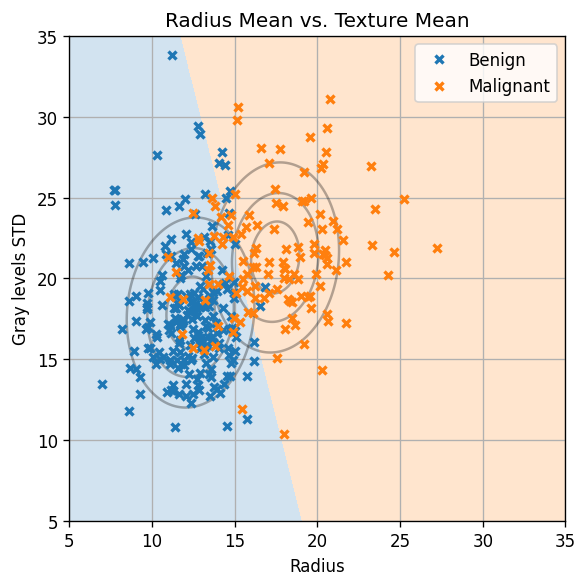

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_train[~y_train, 0], x_train[~y_train, 1], 'x', label='Benign', ms=5, mew=2)
ax.plot(x_train[y_train, 0], x_train[y_train, 1], 'x', label='Malignant', ms=5, mew=2)
plot_grid_predict(ax, h_func, x_grid)
plot_gaussian(ax, x_grid, mu0, cov_mat)
plot_gaussian(ax, x_grid, mu1, cov_mat)
ax.set_title('Radius Mean vs. Texture Mean')
ax.set_xlabel('Radius')
ax.set_ylabel('Gray levels STD');
ax.set_xlim(x_grid[0, 0, 0].min(), x_grid[0, -1, 0].max())
ax.set_ylim(x_grid[0, 0, 1].min(), x_grid[-1, 0, 1].max())
plt.tight_layout()
ax.legend(loc='upper right')
fig.savefig('./output/breast_cancer_lda.png', dpi=240)

In [ ]:
def calc_score(h_func, x, y):
    y_hat = h_func(x)
    score = (y != y_hat).mean()
    return score

print(f'The misclassification rate on the validation is: {calc_score(h_func, x_val, y_val):.2f}')

The misclassification rate on the validation is: 0.09


## QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Create the classifier object
clf = QuadraticDiscriminantAnalysis(store_covariance=True)

## Train the classifier
clf.fit(x_train, y_train)

print(clf.covariance_[0])
print(clf.covariance_[1])

h_func = lambda x: clf.predict(x)

[[ 3.32890856 -0.13032079]
 [-0.13032079 13.79778679]]
[[10.15463563  2.056807  ]
 [ 2.056807   13.20207226]]


The misclassification rate on the validation is: 0.08


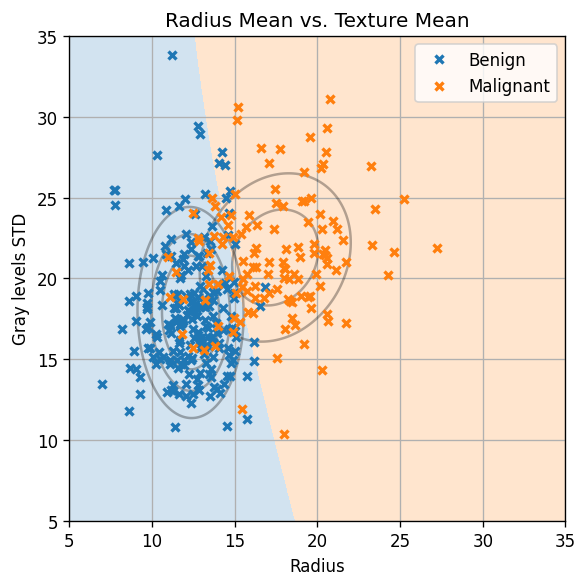

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_train[~y_train, 0], x_train[~y_train, 1], 'x', label='Benign', ms=5, mew=2)
ax.plot(x_train[y_train, 0], x_train[y_train, 1], 'x', label='Malignant', ms=5, mew=2)
plot_grid_predict(ax, h_func, x_grid)
plot_gaussian(ax, x_grid, clf.means_[0], clf.covariance_[0])
plot_gaussian(ax, x_grid, clf.means_[1], clf.covariance_[1])
ax.set_title('Radius Mean vs. Texture Mean')
ax.set_xlabel('Radius')
ax.set_ylabel('Gray levels STD');
ax.set_xlim(x_grid[0, 0, 0].min(), x_grid[0, -1, 0].max())
ax.set_ylim(x_grid[0, 0, 1].min(), x_grid[-1, 0, 1].max())
plt.tight_layout()
ax.legend(loc='upper right')
fig.savefig('./output/breast_cancer_qda.png', dpi=240)

print(f'The misclassification rate on the validation is: {calc_score(h_func, x_val, y_val):.2f}')

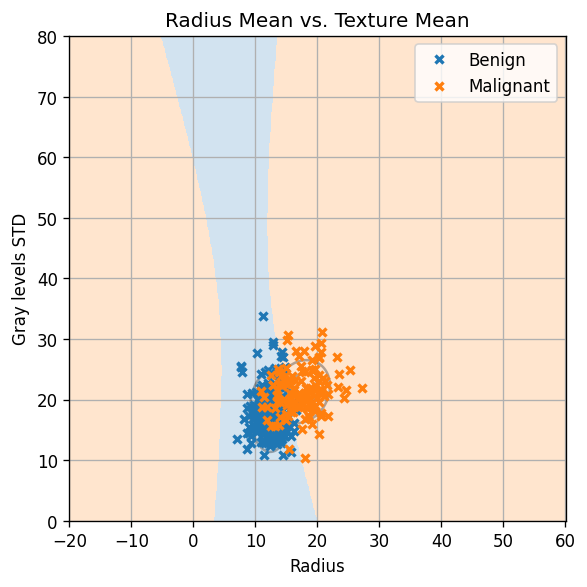

In [ ]:
x_grid = np.stack(np.meshgrid(np.arange(-20, 60 + 1e-9, 0.1), np.arange(0, 80 + 1e-9, 0.1)), axis=2)
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_train[~y_train, 0], x_train[~y_train, 1], 'x', label='Benign', ms=5, mew=2)
ax.plot(x_train[y_train, 0], x_train[y_train, 1], 'x', label='Malignant', ms=5, mew=2)
plot_grid_predict(ax, h_func, x_grid)
plot_gaussian(ax, x_grid, clf.means_[0], clf.covariance_[0])
plot_gaussian(ax, x_grid, clf.means_[1], clf.covariance_[1])
ax.set_title('Radius Mean vs. Texture Mean')
ax.set_xlabel('Radius')
ax.set_ylabel('Gray levels STD');
ax.set_xlim(x_grid[0, 0, 0].min(), x_grid[0, -1, 0].max())
ax.set_ylim(x_grid[0, 0, 1].min(), x_grid[-1, 0, 1].max())
plt.tight_layout()
ax.legend(loc='upper right')
fig.savefig('./output/breast_cancer_qda_zoom_out.png', dpi=240)


x_grid = np.stack(np.meshgrid(np.arange(5, 35 + 1e-9, 0.01), np.arange(5, 35 + 1e-9, 0.01)), axis=2)

In [ ]:
features_names_list = ['radius_mean', 'texture_mean', 'perimeter_mean',
                       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
                       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
                       'fractal_dimension_se', 'radius_worst', 'texture_worst',
                       'perimeter_worst', 'area_worst', 'smoothness_worst',
                       'compactness_worst', 'concavity_worst', 'concave points_worst',
                       'symmetry_worst', 'fractal_dimension_worst']

def extract_x_y(dataset):
    x = dataset[features_names_list].values
    y = dataset['diagnosis'].values == 'M'
    return x, y
x_train, y_train = extract_x_y(train_set)
x_val, y_val = extract_x_y(val_set)

## Create the classifier object
clf = QuadraticDiscriminantAnalysis(store_covariance=True)

## Train the classifier
clf.fit(x_train, y_train)

h_func = lambda x: clf.predict(x)
print(f'The misclassification rate on the validation is: {calc_score(h_func, x_val, y_val):.2f}')

The misclassification rate on the validation is: 0.02


## Linear Logistic Regression

In [ ]:
import tqdm.notebook as tqdm

def extract_x_y(dataset):
    x = dataset[features_names_list].values
    x = x / x.std(axis=0, keepdims=True)
    x = np.concatenate((x, np.ones((len(dataset), 1))), axis=1)
    y = dataset['diagnosis'].values == 'M'
    return x, y

x_train, y_train = extract_x_y(train_set)
x_val, y_val = extract_x_y(val_set)

## The objective function
## ======================
def model(x, y, theta):
    prob = 1 / (1 + np.exp((-1) ** y * (x @ theta)))
    return prob

def objective(x, y, theta):
    return -np.log(model(x, y, theta)).mean()

def objective_grad(x, y, theta):
    return (((1 - model(x, y, theta)) * (-1) ** y)[:, None] * x).mean(axis=0)

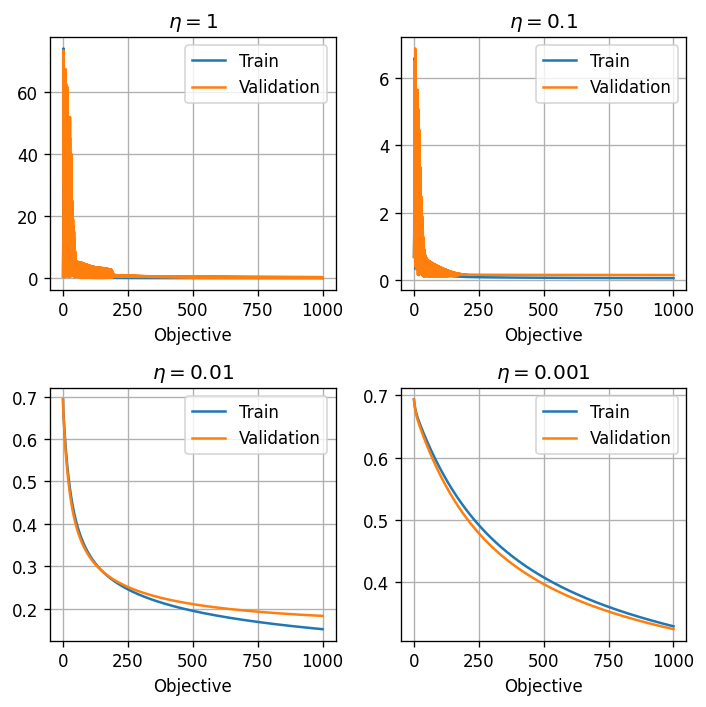

In [ ]:
## The gradient decent algorithm
## =============================
def basic_gradient_decent(objective, objective_grad, eta, n_iters, x_train, y_train, x_val, y_val, store_every=1):
    ## Initialize theta
    theta = np.zeros(x_train.shape[1])

    ## Initialize lists to store intermidiate results for plotting
    steps_list = [0]
    theta_list = [theta.copy()]
    objective_list_train = [objective(x_train, y_train, theta)]
    objective_list_val = [objective(x_val, y_val, theta)]

    ## Perforing the update steps
    for i_iter in tqdm.tqdm(range(1, n_iters + 1)):
        ## Update theta
        theta -= eta * objective_grad(x_train, y_train, theta)

        ## Store intermidiate results
        if i_iter % store_every == 0:
            steps_list.append(i_iter)
            theta_list.append(theta.copy())
            objective_list_train.append(objective(x_train, y_train, theta))
            objective_list_val.append(objective(x_val, y_val, theta))
    
    steps_list = np.array(steps_list)
    theta_list = np.array(theta_list)
    objective_list_train = np.array(objective_list_train)
    objective_list_val = np.array(objective_list_val)

    return steps_list, theta_list, objective_list_train, objective_list_val

n_iters = 1000
etas_list = (1e0, 1e-1, 1e-2, 1e-3)

fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for i_eta, eta in enumerate(etas_list):
    steps_list, theta_list,\
    objective_list_train, objective_list_val = basic_gradient_decent(objective,
                                                                     objective_grad,
                                                                     eta,
                                                                     n_iters,
                                                                     x_train,
                                                                     y_train,
                                                                     x_val,
                                                                     y_val)

    ## Plot
    ax = axes.flat[i_eta]
    ax.plot(steps_list, objective_list_train, label='Train')
    ax.plot(steps_list, objective_list_val, label='Validation')
    ax.set_title(r'$\eta={' + f'{eta:g}' + r'}$')
    ax.set_xlabel('Step')
    ax.set_xlabel('Objective')
    ax.legend()
fig.tight_layout()
fig.savefig('./output/breast_cancer_logistic_select_eta.png', dpi=240)

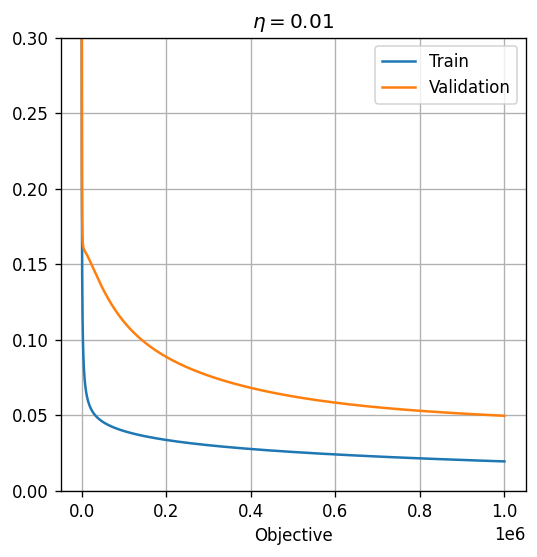

In [ ]:
eta = 1e-2
n_iters = 1000000

steps_list, theta_list,\
objective_list_train, objective_list_val = basic_gradient_decent(objective,
                                                                 objective_grad,
                                                                 eta,
                                                                 n_iters,
                                                                 x_train,
                                                                 y_train,
                                                                 x_val,
                                                                 y_val)

## Plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(steps_list, objective_list_train, label='Train')
ax.plot(steps_list, objective_list_val, label='Validation')
ax.set_title(r'$\eta={' + f'{eta:g}' + r'}$')
ax.set_xlabel('Step')
ax.set_xlabel('Objective')
ax.set_ylim(0, 0.3)
ax.legend()
fig.savefig('./output/breast_cancer_logistic_train.png', dpi=240)

In [ ]:
theta = theta_list[-1]
h_func = lambda x: model(x, np.ones(x.shape[0], dtype=bool), theta) > 0.5
print(f'The misclassification rate on the validation is: {calc_score(h_func, x_val, y_val):.2f}')

The misclassification rate on the validation is: 0.02


In [ ]:
x_test, y_test = extract_x_y(test_set)

print(f'The misclassification rate on the test is: {calc_score(h_func, x_test, y_test):.2f}')

The misclassification rate on the test is: 0.04
